In [1]:
import sys
import torch
import numpy as np
from matplotlib import pyplot as plt
import logging

sys.path.append("../../../")
import manifold_flow as mf
from manifold_flow import transforms, utils, flows, distributions, training
from manifold_flow import nn as nn_

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)


## Data

In [2]:
n = 1000
x0 = torch.randn(n).view(-1,1)
x1 = 0.5*(1.5 + x0)*(1.5-x0)

x = torch.cat([x0,x1],1)

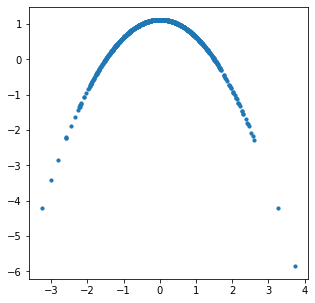

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x0.numpy(), x1.numpy(), s=10.)
plt.show()

## Model

In [4]:
trf = flows.vector_transforms.create_transform(
    dim=2,
    flow_steps=3,
    linear_transform_type="permutation",
    base_transform_type="affine-coupling",
    hidden_features=5,
    num_transform_blocks=2,
    dropout_probability=0.,
    use_batch_norm=False
)

In [5]:
flow = flows.autoencoding_flow.TwoStepAutoencodingFlow(
    data_dim=2,
    latent_dim=1,
    inner_transform=None,
    outer_transform=trf,
)

In [25]:
x_reco_before, log_prob_before, u_before = flow(x)
x_gen_before = flow.sample(n=1000)

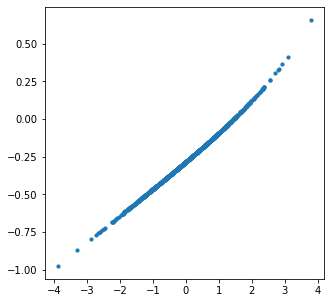

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(x_reco_before.detach().numpy()[:,0], x_reco_before.detach().numpy()[:,1], s=10.)
plt.show()

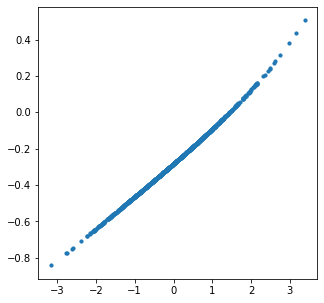

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(x_gen_before.detach().numpy()[:,0], x_gen_before.detach().numpy()[:,1], s=10.)
plt.show()